<a href="https://colab.research.google.com/github/Bommisrilekkhaa/ML/blob/main/ClusteringIrisDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans

In [ ]:
data = pd.read_csv("/content/Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
data.set_index("Id",inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [ ]:
# y,_= pd.factorize(y)
# y

In [ ]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
y = data["Species"]
data.drop("Species",axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_final = sc.fit_transform(data)

In [ ]:
def initialize(x,k):
  indices = np.random.choice(len(x),k,replace=False)
  return x[indices]

In [ ]:
def assign(x,centroids):
  distances=np.linalg.norm(x[:,np.newaxis]-centroids,axis=2)
  return np.argmin(distances,axis=1)

In [ ]:
def update_centroids(x,labels,k):
  centroids = np.array([x[labels == i].mean(axis=0) for i in range(k)])
  return centroids

In [ ]:
def k_means(x,k,max_iters=100):
  centroids = initialize(x,k)

  for _ in range(max_iters):
    labels = assign(x,centroids)
    new_centroids = update_centroids(x,labels,k)

    if np.all(centroids == new_centroids):
      break

    centroids = new_centroids

  return labels,centroids

In [ ]:
x = data[['SepalLengthCm','PetalLengthCm']].values
x

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [ ]:
import warnings
warnings.filterwarnings('ignore')
clust = []

for i in range(1,11):
  kmeans = KMeans(n_clusters= i, init = "k-means++", random_state=0)
  kmeans.fit(x)
  clust.append(kmeans.inertia_)

In [ ]:
model = KMeans(n_clusters= i, init = "k-means++", random_state=0)
y_kmeans = model.fit_predict(x)

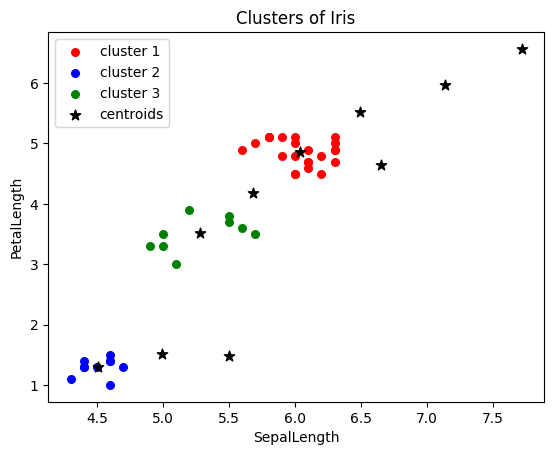

In [ ]:

plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=30,c='red',label='cluster 1',marker="o")
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=30,c='blue',label='cluster 2',marker="o")
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=30,c='green',label='cluster 3',marker="o")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=60,c='black',marker ='*',label='centroids')
plt.title('Clusters of Iris')
plt.xlabel('SepalLength')
plt.ylabel('PetalLength')
plt.legend()
plt.show()

In [ ]:

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5,min_samples = 5)
clusters = dbscan.fit_predict(x)
clusters